In [2]:
!pip install pandas

In [29]:
!pip install seaborn

  Using cached scipy-1.8.0-cp39-cp39-win_amd64.whl (36.9 MB)


In [28]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=1af47c049c8c034ef16a8393d5a7f516caf5f4f5f798431b83c55d878f7577df
  Stored in directory: c:\users\gurma\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [44]:
import pandas as pd
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [45]:
df.shape

(301, 9)

In [46]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [47]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [48]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [49]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [50]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Deriving a new feature from the dataset based on "Year" column

In [51]:
present_year = 2022
age_list=[]
for years in df['Year']:
    age=present_year-years
    age_list.append(age)
df['Model_Age'] = age_list

In [52]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Model_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [53]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Model_Age'],
      dtype='object')

In [55]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Model_Age']]
final_dataset.drop(['Year'],axis=1,inplace=True)

C:\Users\gurma\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Model_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [57]:
#get_dummies is used to perform one hot encoding of the categorical variables

final_dataset = pd.get_dummies(final_dataset,drop_first=True)#drop_first is used to prevent dummy variable trap 


In [58]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Model_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [59]:
final_dataset['Transmission_Manual'].value_counts()

1    261
0     40
Name: Transmission_Manual, dtype: int64

In [60]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Model_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Model_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


# Let's plot the correlation using heatmap to better visualise it

<AxesSubplot:>

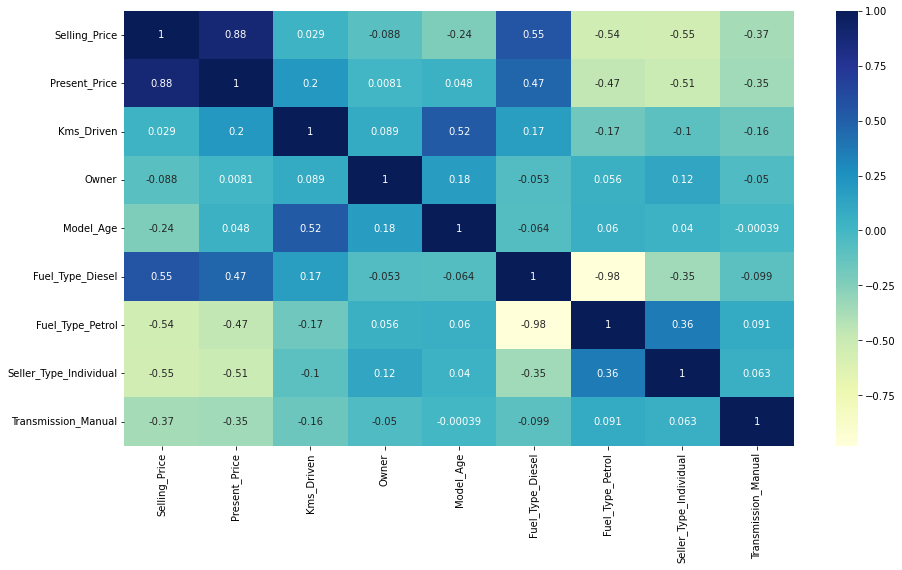

In [61]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sb.heatmap(final_dataset.corr(),cmap="YlGnBu",annot =True)

In [62]:
#independent and dependent features
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [63]:
X.head()

,Present_Price,Kms_Driven,Owner,Model_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [64]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [65]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [66]:
print(model.feature_importances_)

[0.35011318 0.04421051 0.00064451 0.07195013 0.24007442 0.01355265
 0.12594428 0.15351032]


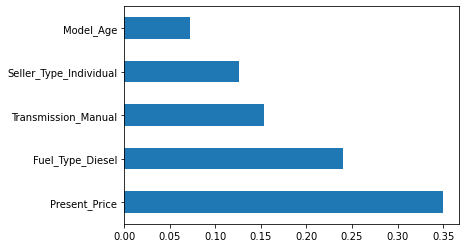

In [67]:
#plot graph of feature importances for better visualisation 
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)

In [72]:
X_train

,Present_Price,Kms_Driven,Owner,Model_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
71,12.48,45000,0,11,1,0,0,1
299,12.50,9000,0,5,1,0,0,1
233,5.70,53000,0,9,1,0,0,1
88,6.05,47000,0,9,0,1,0,1
6,8.12,18796,0,7,0,1,0,1
...,...,...,...,...,...,...,...,...
184,0.75,26000,1,14,0,1,1,1
151,0.55,31000,0,6,0,1,1,1
106,3.45,16500,1,8,0,1,1,1
162,0.99,14500,0,10,0,1,1,1


In [70]:
X_test.shape

(61, 8)

In [94]:
type(X_train['Present_Price'])

pandas.core.series.Series

In [71]:
X_test

,Present_Price,Kms_Driven,Owner,Model_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
98,18.61,45000,0,9,0,1,0,1
283,11.80,9010,0,6,0,1,0,1
176,1.05,30000,0,11,0,1,1,1
288,13.60,34000,0,7,0,1,0,1
255,5.35,53675,0,10,0,1,0,1
...,...,...,...,...,...,...,...,...
91,16.09,58242,0,8,1,0,0,1
55,15.04,70000,0,13,0,1,0,0
133,0.95,500,0,6,0,1,1,1
135,0.74,5000,0,7,0,1,1,1


In [73]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [74]:
#Working with Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [75]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [76]:
#Create the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [77]:
#Use random grid to search for hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)
rf_random.fit(X_train,Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [79]:
rf_random.best_score_

-1.7580731714317799

In [80]:
prediction = rf_random.predict(X_test)
prediction

array([ 5.93468,  8.8378 ,  0.49893,  7.74257,  3.2009 ,  6.02409,
        2.88315,  3.23953,  4.9729 ,  8.09549,  3.75691, 13.30616,
        5.02733,  0.55393,  2.94626,  0.45114,  4.54638,  6.25515,
        3.48441,  0.36784,  4.29395,  0.73359,  5.86336,  2.9433 ,
        5.79088,  0.48579,  5.30845,  5.31195,  0.55361,  4.15   ,
        0.65428,  3.00147, 20.56188,  2.36053, 11.84888,  5.81467,
        0.92635,  5.3049 ,  7.25921,  0.76661,  0.83416,  0.57945,
        5.193  ,  4.32005,  0.5008 ,  5.9316 ,  3.46812,  0.99596,
        7.94492,  6.06772,  0.42073,  5.70141,  0.5108 ,  0.78196,
        8.55398,  1.15004,  8.88172,  4.71149,  0.72211,  0.62495,
        0.71143])

C:\Users\gurma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

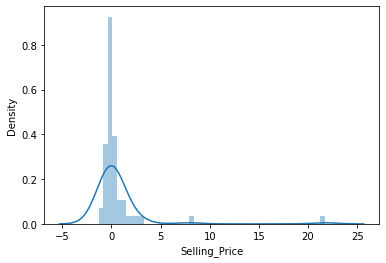

In [81]:
sb.distplot(Y_test-prediction)

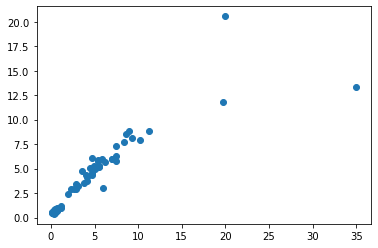

In [82]:
plt.scatter(Y_test,prediction)

In [83]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(Y_test,prediction))
print("MSE:", metrics.mean_squared_error(Y_test,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 0.9561142622950877
MSE: 9.31841018566396
RMSE: 3.0526071128895644


In [87]:
import pickle
file = open('my_random_forest_regression_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)
file.close()